In [272]:
import tarfile
import os
from math import *
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt

### Extraction

In [273]:
# path to /xsec_dat in extracted files directory
xsec_dat_path = 'xsec_pythia8312'

In [274]:

# get a list of all filenames from /xsec_dat 
file_list = [os.path.join(xsec_dat_path, f) for f in os.listdir(xsec_dat_path) if os.path.isfile(os.path.join(xsec_dat_path, f))]

In [275]:

# read each file into a pandas df
dataframes = {}
for file in file_list:
    try:
        # no header in the files
        df = pd.read_csv(file, delimiter='\t', header=None)
        # store df with filename
        dataframes[file] = df
    except pd.errors.EmptyDataError:
        print(f"Skipping file with no columns to parse: {file}")
    except Exception as e:
        print(f"Error reading {file}: {e}")


Files from Maximilian Reininghaus for hadronic interaction model datasets: Sibyll 2.3d, EPpS-LHC, QGSJet-II.04 and Pythia 8.3.07.

In [276]:
xsec_max_path = './xsec_max_files'

xs_p_O_sib = loadtxt(f"{xsec_max_path}/xs_p_O_sib23d.dat", unpack=True)
xs_p_O_epos = loadtxt(f"{xsec_max_path}/xs_p_O_EPOS-LHC.dat", unpack=True)
xs_p_O_qgs = loadtxt(f"{xsec_max_path}/xs_p_O_qgsII04.dat", unpack=True)
xs_p_O_py8307 = loadtxt(f"{xsec_max_path}/xs_p_O_Pythia8307.dat", unpack=True)

xs_pip_O_sib = loadtxt(f"{xsec_max_path}/xs_pi_O_sib23d.dat", unpack=True)
xs_pip_O_qgs = loadtxt(f"{xsec_max_path}/xs_pi_O_qgsII04.dat", unpack=True)
xs_pip_O_epos = loadtxt(f"{xsec_max_path}/xs_pi_O_EPOS-LHC.dat", unpack=True)
xs_pip_O_py8307 = loadtxt(f"{xsec_max_path}/xs_pi_O_Pythia8307.dat", unpack=True)

xs_p_p_sib = loadtxt(f"{xsec_max_path}/xs_p_p_sib23d.dat", unpack=True)
xs_p_p_epos = loadtxt(f"{xsec_max_path}/xs_p_p_EPOS-LHC.dat", unpack=True)
xs_p_p_py8307 = loadtxt(f"{xsec_max_path}/xs_p_p_Pythia8307.dat", unpack=True)

xs_pip_p_sib = loadtxt(f"{xsec_max_path}/xs_pi_p_sib23d.dat", unpack=True)
xs_pip_p_epos = loadtxt(f"{xsec_max_path}/xs_pi_p_EPOS-LHC.dat", unpack=True)
xs_pip_p_py8307 = loadtxt(f"{xsec_max_path}/xs_pi_p_Pythia8307.dat", unpack=True)

Exported datasets from Pythia 8.3.10 from jupyter notebook `pythi8310/Pythia8.3.10_cross_section_tables.ipynb`:

In [277]:
xs_p_O_py8310 = [326.561, 357.313, 397.736, 438.032, 484.021, 538.804, 612.224, 694.637, 796.673, 914.109]
xs_p_O_py8310_err = [0.208, 0.276, 0.340, 0.372, 0.340, 0.302, 0.028, 0.289, 0.282, 0.283]
xs_pip_O_py8310 = [261.857, 288.653, 331.384, 383.752, 426.441, 494.747, 555.011, 690.725, 810.340, 737.710]
xs_pip_O_py8310_err = [0.026, 0.010, 0.015, 0.028, 0.025, 0.030, 1.968, 1.841, 1.948, 1.247]
elab_py8310 = [1e+11, 1e+12, 1e+13, 1e+14, 1e+15, 1e+16, 1e+17, 1e+18, 1e+19, 1e+20]

Exported datasets from Pythia 8.3.11 from jupyter notebook `pythi8311/pythia8311_xsec_plotting.ipynb`:

In [278]:
xs_p_p_py8311 = [31.489, 34.421, 39.814 ,  46.915, 55.620, 66.101, 78.671, 93.745, 111.833, 133.556, 159.661]
xs_p_p_py8311_err = [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.002]
xs_pip_p_py8311 = [20.335, 22.651, 26.496, 31.487, 37.612, 45.017, 53.934, 64.665, 77.578, 93.119, 111.707]
xs_pip_p_py8311_err = [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.013]
xs_p_O_py8311 = [311.330, 342.175, 380.661, 422.697, 467.155, 515.759, 570.786, 634.530, 692.921, 778.915, 863.308]
xs_p_O_py8311_err = [0.104, 0.187, 0.302, 0.341, 0.360, 0.298, 0.259, 0.252, 0.229, 0.241, 0.239]
xs_pip_O_py8311 = [252.617, 286.614, 317.381, 365.187, 417.173, 474.305, 482.629, 535.185, 593.296, 675.978, 761.752] 
xs_pip_O_py8311_err = [0.049, 0.147, 0.108, 0.170, 0.168, 0.186, 0.116, 0.116, 0.103, 1.112, 0.131] 

### Selection

Filter out only filenames matching `main1010_p_16p*.dat` and `main1010_pip_16p*.dat` for simulations using oxygen-16 as a target, and `main1010_p_1H*.dat` and `main1010_pip_1H*.dat` for simulations using a proton as a target.

In [279]:
p_p_filtered_dataframes = {file: df for file, df in dataframes.items() if "main1011_p_1H" in file}
pip_p_filtered_dataframes = {file: df for file, df in dataframes.items() if "main1010_pip_1H" in file}
p_N_filtered_dataframes = {file: df for file, df in dataframes.items() if "main1011_p_14N" in file}
pip_N_filtered_dataframes = {file: df for file, df in dataframes.items() if "main1011_pip_14N" in file}
p_O_filtered_dataframes = {file: df for file, df in dataframes.items() if "main1010_p_16O" in file}
pip_O_filtered_dataframes = {file: df for file, df in dataframes.items() if "main1010_pip_16O" in file}

He_N_filtered_dataframes = {file: df for file, df in dataframes.items() if "main1011_4He_14N" in file}
N_N_filtered_dataframes = {file: df for file, df in dataframes.items() if "main1011_14N_14N" in file}
Fe_N_filtered_dataframes = {file: df for file, df in dataframes.items() if "main1011_56Fe_14N" in file}

In [280]:
p_p_dataframes = []

for file, df in p_p_filtered_dataframes.items():
    sig_inel = df.loc[df[0] == 'sig_inel', 1].astype(float)
    err_inel = df.loc[df[0] == 'err_inel', 1].astype(float)
    elab = df.loc[df[0] == 'elab', 1].astype(float).values[0]   
    p_p_dataframe = pd.DataFrame({'elab': [elab], 'sig_inel': [sig_inel.values[0]], 'err_inel': [err_inel.values[0]]})
    p_p_dataframes.append(p_p_dataframe)
p_p_dataframe = pd.concat(p_p_dataframes, ignore_index=True)
p_p_dataframe = p_p_dataframe.sort_values(by='elab')


In [281]:
pip_p_dataframes = []

for file, df in pip_p_filtered_dataframes.items():
    sig_inel = df.loc[df[0] == 'sig_inel', 1].astype(float)
    err_inel = df.loc[df[0] == 'err_inel', 1].astype(float)
    elab = df.loc[df[0] == 'elab', 1].astype(float).values[0]   
    pip_p_dataframe = pd.DataFrame({'elab': [elab], 'sig_inel': [sig_inel.values[0]], 'err_inel': [err_inel.values[0]]})
    pip_p_dataframes.append(pip_p_dataframe)
pip_p_dataframe = pd.concat(pip_p_dataframes, ignore_index=True)
pip_p_dataframe = pip_p_dataframe.sort_values(by='elab')


In [282]:
p_O_dataframes = []

for file, df in p_O_filtered_dataframes.items():
    # extract rows labeled sig_inel, err_inel and elab
    sig_inel = df.loc[df[0] == 'sig_inel', 1].astype(float)
    err_inel = df.loc[df[0] == 'err_inel', 1].astype(float)
    elab = df.loc[df[0] == 'elab', 1].astype(float).values[0]   
    p_O_dataframe = pd.DataFrame({'elab': [elab], 'sig_inel': [sig_inel.values[0]], 'err_inel': [err_inel.values[0]]})
    p_O_dataframes.append(p_O_dataframe)
p_O_dataframe = pd.concat(p_O_dataframes, ignore_index=True)
p_O_dataframe = p_O_dataframe.sort_values(by='elab')


In [283]:
pip_O_dataframes = []

for file, df in pip_O_filtered_dataframes.items():
    sig_inel = df.loc[df[0] == 'sig_inel', 1].astype(float)
    err_inel = df.loc[df[0] == 'err_inel', 1].astype(float)
    elab = df.loc[df[0] == 'elab', 1].astype(float).values[0]   
    pip_O_dataframe = pd.DataFrame({'elab': [elab], 'sig_inel': [sig_inel.values[0]], 'err_inel': [err_inel.values[0]]})
    pip_O_dataframes.append(pip_O_dataframe)
pip_O_dataframe = pd.concat(pip_O_dataframes, ignore_index=True)
pip_O_dataframe = pip_O_dataframe.sort_values(by='elab')


In [284]:
pip_N_dataframes = []

for file, df in pip_N_filtered_dataframes.items():
    sig_inel = df.loc[df[0] == 'sig_inel', 1].astype(float)
    err_inel = df.loc[df[0] == 'err_inel', 1].astype(float)
    elab = df.loc[df[0] == 'elab', 1].astype(float).values[0]   
    pip_N_dataframe = pd.DataFrame({'elab': [elab], 'sig_inel': [sig_inel.values[0]], 'err_inel': [err_inel.values[0]]})
    pip_N_dataframes.append(pip_N_dataframe)
pip_N_dataframe = pd.concat(pip_N_dataframes, ignore_index=True)
pip_N_dataframe = pip_N_dataframe.sort_values(by='elab')


In [285]:
p_N_dataframes = []

for file, df in p_N_filtered_dataframes.items():
    sig_inel = df.loc[df[0] == 'sig_inel', 1].astype(float)
    err_inel = df.loc[df[0] == 'err_inel', 1].astype(float)
    elab = df.loc[df[0] == 'elab', 1].astype(float).values[0]   
    p_N_dataframe = pd.DataFrame({'elab': [elab], 'sig_inel': [sig_inel.values[0]], 'err_inel': [err_inel.values[0]]})
    p_N_dataframes.append(p_N_dataframe)
p_N_dataframe = pd.concat(p_N_dataframes, ignore_index=True)
p_N_dataframe = p_N_dataframe.sort_values(by='elab')


In [286]:
He_N_dataframes = []

for file, df in He_N_filtered_dataframes.items():
    sig_inel = df.loc[df[0] == 'sig_inel', 1].astype(float)
    err_inel = df.loc[df[0] == 'err_inel', 1].astype(float)
    elab = df.loc[df[0] == 'elab', 1].astype(float).values[0]   
    He_N_dataframe = pd.DataFrame({'elab': [elab], 'sig_inel': [sig_inel.values[0]], 'err_inel': [err_inel.values[0]]})
    He_N_dataframes.append(He_N_dataframe)
He_N_dataframe = pd.concat(He_N_dataframes, ignore_index=True)
He_N_dataframe = He_N_dataframe.sort_values(by='elab')

In [287]:
N_N_dataframes = []

for file, df in N_N_filtered_dataframes.items():
    sig_inel = df.loc[df[0] == 'sig_inel', 1].astype(float)
    err_inel = df.loc[df[0] == 'err_inel', 1].astype(float)
    elab = df.loc[df[0] == 'elab', 1].astype(float).values[0]   
    N_N_dataframe = pd.DataFrame({'elab': [elab], 'sig_inel': [sig_inel.values[0]], 'err_inel': [err_inel.values[0]]})
    N_N_dataframes.append(N_N_dataframe)
N_N_dataframe = pd.concat(N_N_dataframes, ignore_index=True)
N_N_dataframe = N_N_dataframe.sort_values(by='elab')

In [288]:
Fe_N_dataframes = []

for file, df in Fe_N_filtered_dataframes.items():
    if 'sig_inel' in df[0].values and 'err_inel' in df[0].values:
        sig_inel = df.loc[df[0] == 'sig_inel', 1].astype(float)
        err_inel = df.loc[df[0] == 'err_inel', 1].astype(float)
        elab = df.loc[df[0] == 'elab', 1].astype(float).values[0]
        sig_inel_value = sig_inel.values[0]
        err_inel_value = err_inel.values[0]
        Fe_N_dataframe = pd.DataFrame({'elab': [elab], 'sig_inel': [sig_inel_value], 'err_inel': [err_inel_value]})
        Fe_N_dataframes.append(Fe_N_dataframe)

Fe_N_dataframe = pd.concat(Fe_N_dataframes, ignore_index=True)
Fe_N_dataframe = Fe_N_dataframe.sort_values(by='elab')

### Plotting

In [289]:
pp_stat_error = 7
pp_syst_error_pos = 9
pp_syst_error_neg = 11
pp_glauber_error = 7

pp_total_error_pos = sqrt(pp_stat_error**2 + pp_syst_error_pos**2 + pp_glauber_error**2)
pp_total_error_neg = sqrt(pp_stat_error**2 + pp_syst_error_neg**2 + pp_glauber_error**2)

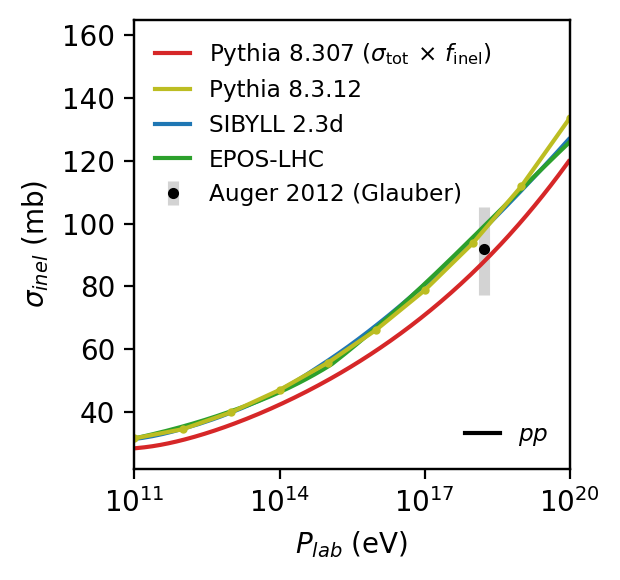

In [290]:
fig, ax = plt.subplots(figsize=(3.2,3), dpi=200)
ax.set(xlim=(1e11,1e20))
ax.set_xscale('log')
ax.set(xlabel=r"$P_{lab}$ (eV)", ylabel=r"$\sigma_{inel}$ (mb)")

ax.errorbar(10**18.24, 92, yerr=[[pp_total_error_neg], [pp_total_error_pos]], c='black', fmt='o', ms=3, ecolor='lightgrey', elinewidth=4, label="Auger 2012 (Glauber)")
ax.plot(xs_p_p_py8307[0,:], xs_p_p_py8307[1,:] * 0.9, "-", color="C3", label="Pythia 8.307 ($\\sigma_{\\mathrm{tot}} \\, \\times \\, f_{\\mathrm{inel}}$)")
#ax.errorbar(p_O_dataframe['elab']*1e9, xs_p_p_py8311, yerr=xs_p_p_py8311_err, c='tab:orange', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='--')
#ax.plot([None], [None], "--", color="tab:orange", label="Pythia 8.3.11")
ax.errorbar(p_p_dataframe['elab']*1e9, p_p_dataframe['sig_inel'], yerr=p_p_dataframe['err_inel'], c='tab:olive', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='-')
ax.plot([None], [None], ls='-', color="tab:olive", label="Pythia 8.3.12")
ax.plot(xs_p_p_sib[0,:], xs_p_p_sib[1,:], "-", color="C0", label="SIBYLL 2.3d")
ax.plot(xs_p_p_epos[0,:], xs_p_p_epos[1,:], "-", color="C2", label="EPOS-LHC")
ax.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize="small", frameon=False, handlelength=1.5)

ax2 = ax.twinx()
ax2.get_yaxis().set_visible(False)
ax2.plot([None], [None], "-", color="black", label="$pp$")
ax2.legend(loc='lower right', bbox_to_anchor=(1, 0), fontsize="small", frameon=False, handlelength=1.5)

fig.tight_layout()
fig.savefig("xs_inel_pp.png", dpi=400)

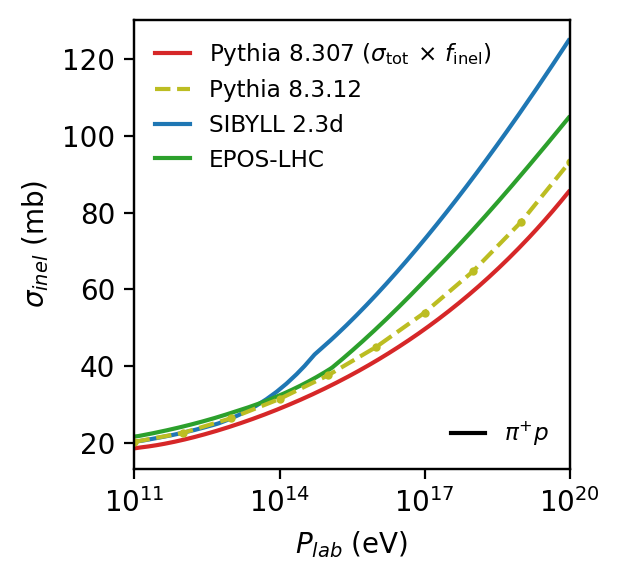

In [291]:
fig, ax = plt.subplots(figsize=(3.2,3), dpi=200)
ax.set(xlim=(1e11,1e20))
ax.set_xscale('log')
ax.set(xlabel=r"$P_{lab}$ (eV)", ylabel=r"$\sigma_{inel}$ (mb)")

ax.plot(xs_pip_p_py8307[0,:], xs_pip_p_py8307[1,:] * 0.92, "-C3", label="Pythia 8.307 ($\\sigma_{\\mathrm{tot}} \\, \\times \\, f_{\\mathrm{inel}}$)")
#ax.errorbar(pip_p_dataframe['elab']*1e9, xs_pip_p_py8311, yerr=xs_pip_p_py8311_err, c='tab:orange', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='--')
#ax.plot([None], [None], "--", color="tab:orange", label="Pythia 8.3.11")
ax.errorbar(pip_p_dataframe['elab']*1e9, pip_p_dataframe['sig_inel'], yerr=pip_p_dataframe['err_inel'], c='tab:olive', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='--')
ax.plot([None], [None], ls='--', color="tab:olive", label="Pythia 8.3.12")
ax.plot(xs_pip_p_sib[0,:], xs_pip_p_sib[1,:], "-", label="SIBYLL 2.3d")
ax.plot(xs_pip_p_epos[0,:], xs_pip_p_epos[1,:], "-C2", label="EPOS-LHC")
ax.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize="small", frameon=False, handlelength=1.5)

ax2 = ax.twinx()
ax2.get_yaxis().set_visible(False)
ax2.plot([None], [None], "-", color="black", label=r"$\pi^{+}p$")
ax2.legend(loc='lower right', bbox_to_anchor=(1, 0), fontsize="small", frameon=False, handlelength=1.5)

fig.tight_layout()
fig.savefig("xs_inel_pip.png", dpi=400)

In [292]:
pair_stat_error = 22
pair_syst_error_pos = 28
pair_syst_error_neg = 36
pair_total_error_pos = sqrt(pair_stat_error**2 + pair_syst_error_pos**2)
pair_total_error_neg = sqrt(pair_stat_error**2 + pair_syst_error_neg**2)

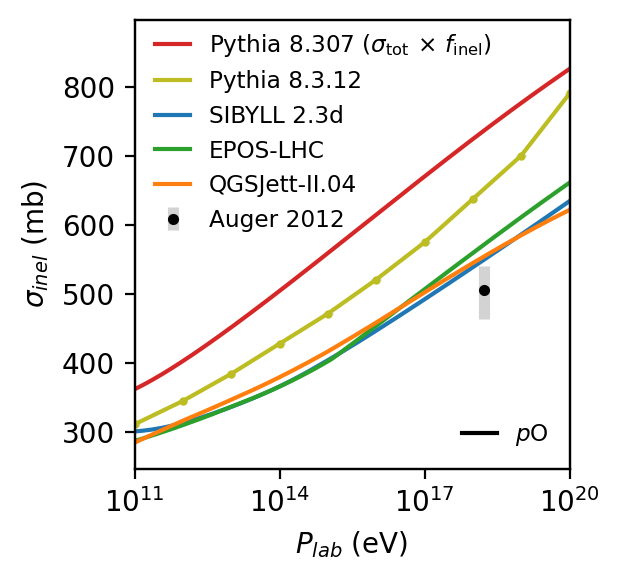

In [293]:
fig, ax = plt.subplots(figsize=(3.2,3), dpi=200)
ax.set(xlim=(1e11,1e20))
ax.set_xscale('log')
ax.set(xlabel=r"$P_{lab}$ (eV)", ylabel=r"$\sigma_{inel}$ (mb)")

ax.plot(xs_p_O_py8307[0,:], xs_p_O_py8307[1,:] * 0.9, "-", color="C3", label="Pythia 8.307 ($\\sigma_{\\mathrm{tot}} \\, \\times \\, f_{\\mathrm{inel}}$)")
#ax.errorbar(elab_py8310, xs_p_O_py8310, yerr=xs_p_O_py8310_err, c='tab:purple', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='--')
#ax.plot([None], [None], ls='--', color="tab:purple", label="Pythia 8.3.10")
#ax.errorbar(p_O_dataframe['elab']*1e9, xs_p_O_py8311, yerr=xs_p_O_py8311_err, c='tab:orange', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='--')
#ax.plot([None], [None], ls='--', color="tab:orange", label="Pythia 8.3.11")
ax.errorbar(p_O_dataframe['elab']*1e9, p_O_dataframe['sig_inel'], yerr=p_O_dataframe['err_inel'], c='tab:olive', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='-')
ax.plot([None], [None], ls='-', color="tab:olive", label="Pythia 8.3.12")
ax.plot(xs_p_O_sib[0,:], xs_p_O_sib[1,:], "-", color="C0", label="SIBYLL 2.3d")
ax.plot(xs_p_O_epos[0,:], xs_p_O_epos[1,:], "-", color="C2", label="EPOS-LHC")
ax.plot(xs_p_O_qgs[0,:], xs_p_O_qgs[1,:], "-", color="C1", label="QGSJett-II.04")
ax.errorbar(10**18.24, 505, yerr=[[pair_total_error_neg], [pair_total_error_pos]], c='black', fmt='o', ms=3, ecolor='lightgrey', elinewidth=4, label="Auger 2012")
ax.legend(loc='upper left', bbox_to_anchor=(0, 1.02), fontsize="small", frameon=False, handlelength=1.5)

ax2 = ax.twinx()
ax2.get_yaxis().set_visible(False)
ax2.plot([None], [None], "-", color="black", label="$p$O")
ax2.legend(loc='lower right', bbox_to_anchor=(1, 0), fontsize="small", frameon=False, handlelength=1.5)

fig.tight_layout()
fig.savefig("xs_inel_pO.png", dpi=400)

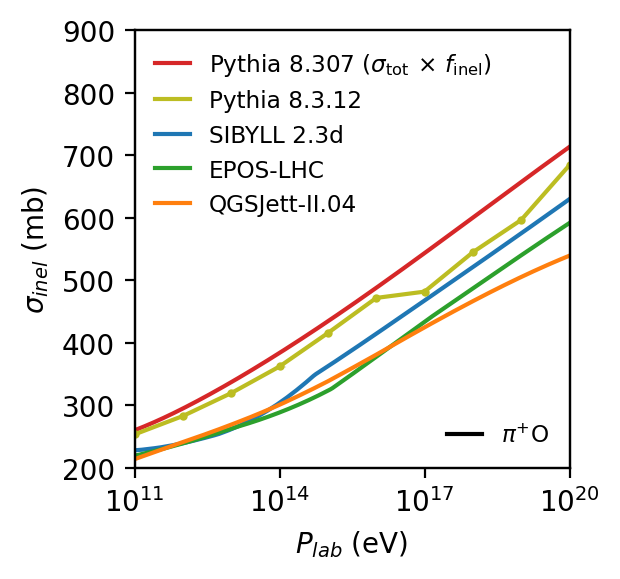

In [294]:
fig, ax = plt.subplots(figsize=(3.2,3), dpi=200)
ax.set(xlim=(1e11,1e20), ylim=(200,900))
ax.set_xscale('log')
ax.set(xlabel=r"$P_{lab}$ (eV)", ylabel=r"$\sigma_{inel}$ (mb)")

ax.plot(xs_pip_O_py8307[0,:], xs_pip_O_py8307[1,:] * 0.92, "-C3", label="Pythia 8.307 ($\\sigma_{\\mathrm{tot}} \\, \\times \\, f_{\\mathrm{inel}}$)")
#ax.errorbar(elab_py8310, xs_pip_O_py8310, yerr=xs_pip_O_py8310_err, c='tab:purple', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='-')
#ax.plot([None], [None], "-", color="tab:purple", label="Pythia 8.3.10")
#ax.errorbar(pip_O_dataframe['elab']*1e9, xs_pip_O_py8311, yerr=xs_pip_O_py8311_err, c='tab:orange', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='-')
#ax.plot([None], [None], "-", color="tab:orange", label="Pythia 8.3.11")
ax.errorbar(pip_O_dataframe['elab']*1e9, pip_O_dataframe['sig_inel'], yerr=pip_O_dataframe['err_inel'], c='tab:olive', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='-')
ax.plot([None], [None], ls='-', color="tab:olive", label="Pythia 8.3.12")
ax.plot(xs_pip_O_sib[0,:], xs_pip_O_sib[1,:], "-", label="SIBYLL 2.3d")
ax.plot(xs_pip_O_epos[0,:], xs_pip_O_epos[1,:], "-C2", label="EPOS-LHC")
ax.plot(xs_pip_O_qgs[0,:], xs_pip_O_qgs[1,:], "-", color="C1", label="QGSJett-II.04")
ax.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize="small", frameon=False, handlelength=1.5)

ax2 = ax.twinx()
ax2.get_yaxis().set_visible(False)
ax2.plot([None], [None], "-", color="black", label=r"$\pi^{+}$O")
ax2.legend(loc='lower right', bbox_to_anchor=(1, 0), fontsize="small", frameon=False, handlelength=1.5)

fig.tight_layout()
fig.savefig("xs_inel_piO.png", dpi=400)

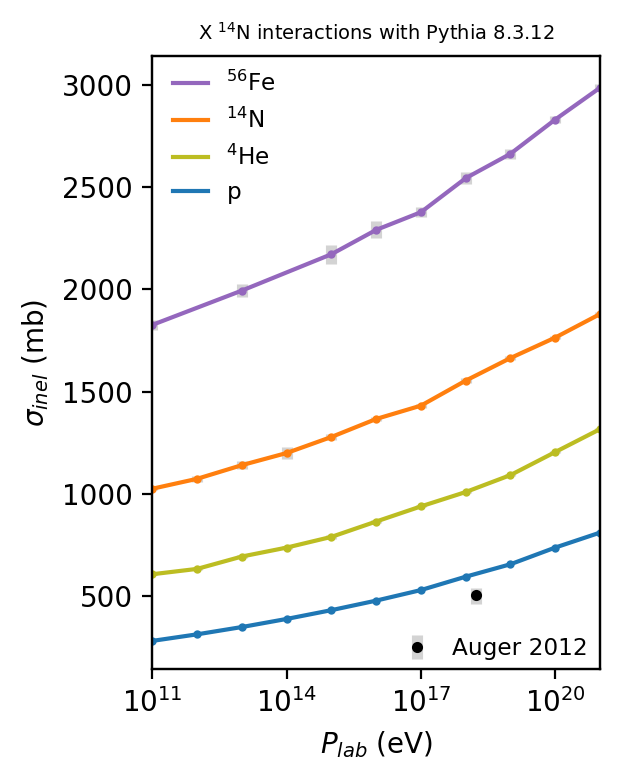

In [295]:
fig, ax = plt.subplots(figsize=(3.2,4), dpi=200)
ax.set_title("X $^{14}$N interactions with Pythia 8.3.12", fontsize=7)
ax.set(xlim=(1e11,1e21))
ax.set_xscale('log')
ax.set(xlabel=r"$P_{lab}$ (eV)", ylabel=r"$\sigma_{inel}$ (mb)")

ax.errorbar(Fe_N_dataframe['elab']*1e9, Fe_N_dataframe['sig_inel'], yerr=Fe_N_dataframe['err_inel'], c='tab:purple', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='-')
ax.plot([None], [None], ls='-', color="tab:purple", label="$^{56}$Fe")
ax.errorbar(N_N_dataframe['elab']*1e9, N_N_dataframe['sig_inel'], yerr=N_N_dataframe['err_inel'], c='tab:orange', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='-')
ax.plot([None], [None], ls='-', color="tab:orange", label="$^{14}$N")
ax.errorbar(He_N_dataframe['elab']*1e9, He_N_dataframe['sig_inel'], yerr=He_N_dataframe['err_inel'], c='tab:olive', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='-')
ax.plot([None], [None], ls='-', color="tab:olive", label="$^{4}$He")
ax.errorbar(p_N_dataframe['elab']*1e9, p_N_dataframe['sig_inel'], yerr=p_N_dataframe['err_inel'], c='tab:blue', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='-')
ax.plot([None], [None], ls='-', color="tab:blue", label="p")
ax.legend(loc='upper left', bbox_to_anchor=(0, 1.01), fontsize="small", frameon=False, handlelength=1.5)

ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.get_yaxis().set_visible(False)
ax2.errorbar(10**18.24, 505, yerr=[[pair_total_error_neg], [pair_total_error_pos]], c='black', fmt='o', ms=3, ecolor='lightgrey', elinewidth=4, label="Auger 2012")
ax2.legend(loc='lower right', bbox_to_anchor=(1.02, -0.02), fontsize="small", frameon=False, handlelength=1.5)

fig.tight_layout()
fig.savefig("xs_inel_XN.png", dpi=400)

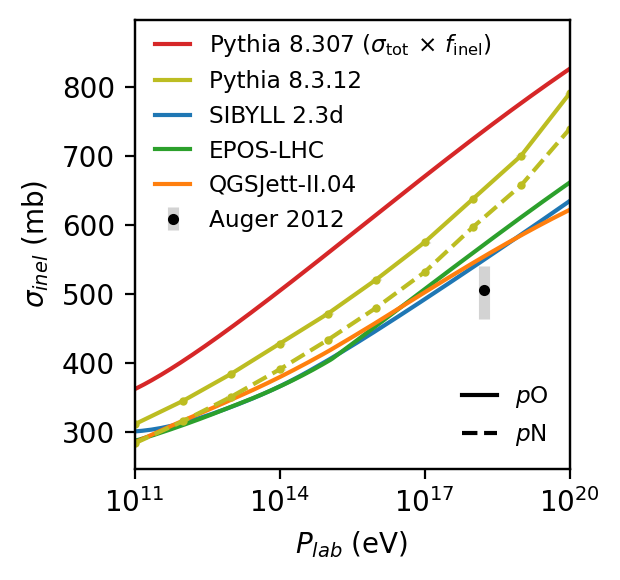

In [296]:
fig, ax = plt.subplots(figsize=(3.2,3), dpi=200)
ax.set(xlim=(1e11,1e20))
ax.set_xscale('log')
ax.set(xlabel=r"$P_{lab}$ (eV)", ylabel=r"$\sigma_{inel}$ (mb)")

ax.plot(xs_p_O_py8307[0,:], xs_p_O_py8307[1,:] * 0.9, "-", color="C3", label="Pythia 8.307 ($\\sigma_{\\mathrm{tot}} \\, \\times \\, f_{\\mathrm{inel}}$)")
ax.errorbar(p_O_dataframe['elab']*1e9, p_O_dataframe['sig_inel'], yerr=p_O_dataframe['err_inel'], c='tab:olive', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='-')
ax.errorbar(p_N_dataframe['elab']*1e9, p_N_dataframe['sig_inel'], yerr=p_N_dataframe['err_inel'], c='tab:olive', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='--')
ax.plot([None], [None], ls='-', color="tab:olive", label="Pythia 8.3.12")
ax.plot(xs_p_O_sib[0,:], xs_p_O_sib[1,:], "-", color="C0", label="SIBYLL 2.3d")
ax.plot(xs_p_O_epos[0,:], xs_p_O_epos[1,:], "-", color="C2", label="EPOS-LHC")
ax.plot(xs_p_O_qgs[0,:], xs_p_O_qgs[1,:], "-", color="C1", label="QGSJett-II.04")
ax.errorbar(10**18.24, 505, yerr=[[pair_total_error_neg], [pair_total_error_pos]], c='black', fmt='o', ms=3, ecolor='lightgrey', elinewidth=4, label="Auger 2012")
ax.legend(loc='upper left', bbox_to_anchor=(0, 1.02), fontsize="small", frameon=False, handlelength=1.5)

ax2 = ax.twinx()
ax2.get_yaxis().set_visible(False)
ax2.plot([None], [None], "-", color="black", label="$p$O")
ax2.plot([None], [None], "--", color="black", label="$p$N")
ax2.legend(loc='lower right', bbox_to_anchor=(1, 0), fontsize="small", frameon=False, handlelength=1.5)

fig.tight_layout()
fig.savefig("xs_inel_pN_pO.png", dpi=400)